###### From the Kaggle (not used code)

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# import warnings
# warnings.filterwarnings('ignore')
# %config Completer.use_jedi = False # if autocompletion doesnot work in kaggle notebook | hit tab

# # importing the dataset 
# df_train = pd.read_csv('../input/emotions-dataset-for-nlp/train.txt', header =None, sep =';', names = ['Input','Sentiment'], encoding='utf-8')
# df_test = pd.read_csv('../input/emotions-dataset-for-nlp/test.txt', header = None, sep =';', names = ['Input','Sentiment'],encoding='utf-8')
# df_val=pd.read_csv('../input/emotions-dataset-for-nlp/val.txt',header=None,sep=';',names=['Input','Sentiment'],encoding='utf-8')

### Loading and Exploring the Data

In [6]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/Book-Woofer/Emotion_final.csv")
df.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [8]:
df['Emotion'].value_counts()

happy       7029
sadness     6265
anger       2993
fear        2652
love        1641
surprise     879
Name: Emotion, dtype: int64

### Splitting the Data into 3 Parts (Train, Test, Val) and Exporting them as csv

In [9]:
from sklearn.model_selection import train_test_split

df_train, df_rem = train_test_split(df,test_size=0.2,train_size=0.8)
df_val, df_test = train_test_split(df_rem,test_size=0.5,train_size=0.5)

In [10]:
# ! pip install fast-ml
# from fast_ml.model_development import train_valid_test_split

# X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df, target = 'Emotion', 
#                                                                             train_size=0.7, valid_size=0.2, test_size=0.1)

In [11]:
print(df_train.shape, df_test.shape, df_val.shape)

(17167, 2) (2146, 2) (2146, 2)


In [12]:
df_train.to_csv('Emotion_train%80-10-10.csv')
df_test.to_csv('Emotion_test%80-10-10.csv')
df_val.to_csv('Emotion_val%80-10-10.csv')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


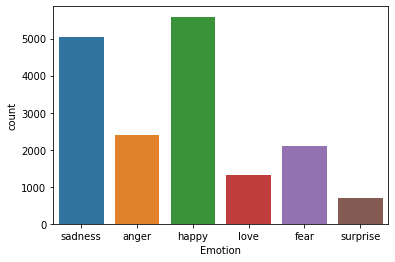

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()
# %config InlineBackend.figure_format = 'retina'

sns.countplot(df_train.Emotion)
plt.show()

### Adding a column 'Length' and explore the lengths of the Text

In [14]:
df_train['Length'] = df_train.Text.apply(lambda x:len(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


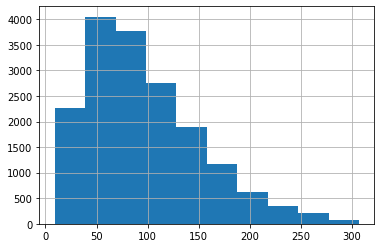

In [15]:
# plt.plot(df_train.Length)
df_train.Length.hist()

In [16]:
display(df_train.Length.max())
display(int(df_train.Length.mean()))
display(int(df_train.Length.std()))

307

96

55

### Preprocessing with package from kaggle

In [17]:
# preprocessing library from kaggle 
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall
!pip install BeautifulSoup4

import preprocess_kgptalkie as ps

# %%time

from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

def text_preprocessing(df,col_name):
    column = col_name
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
    df[column] = df[column].progress_apply(lambda x: ps.cont_exp(x)) #you're -> you are; i'm -> i am
    df[column] = df[column].progress_apply(lambda x: ps.remove_emails(x))
    df[column] = df[column].progress_apply(lambda x: ps.remove_html_tags(x))
#     df[column] = df[column].progress_apply(lambda x: ps.remove_stopwords(x))

    df[column] = df[column].progress_apply(lambda x: ps.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x: ps.remove_accented_chars(x))
    df[column] = df[column].progress_apply(lambda x: ps.make_base(x)) #ran -> run,
    return(df)

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-htyvkezz
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-htyvkezz
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-cp37-none-any.whl size=11759 sha256=60cbdd3191531841b54a94296a462177d2cbebfcb10fced66ddacc0681942394
  Stored in directory: /tmp/pip-ephem-wheel-cache-p8_3sdjr/wheels/a8/18/22/90afa4bd43247fb9a75b710a4a3fcd94966c022ce9e3c7d0a6
Successfully built preprocess-kgptalkie


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [18]:
df_cleaned_train = text_preprocessing(df_train, 'Text')
df_cleaned_train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Text,Emotion,Length
20525,one unnamed area was criticise after it appear...,sadness,105
6247,i have no idea i was give off this vibe but i ...,anger,121
5150,i feel defeat loss and confused,sadness,33
13030,i am feel mad at him as he do not reply get me...,anger,61
13498,i like to keep them on hand when i m feeling n...,happy,74


In [49]:
df_cleaned_test = text_preprocessing(df_test, 'Text')
df_cleaned_val = text_preprocessing(df_val, 'Text')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [19]:
df_train.to_csv('Emotion_train_cleaned%80-10-10.csv')

In [20]:
df_cleaned_train.head()

,Text,Emotion,Length
20525,one unnamed area was criticise after it appear...,sadness,105
6247,i have no idea i was give off this vibe but i ...,anger,121
5150,i feel defeat loss and confused,sadness,33
13030,i am feel mad at him as he do not reply get me...,anger,61
13498,i like to keep them on hand when i m feeling n...,happy,74


### df Emotion Column to Numbers

In [57]:
df_cleaned_train['Emotion']=df_cleaned_train.Emotion.replace({'happy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})
df_test['Emotion']=df_test.Emotion.replace({'happy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})
df_val['Emotion']=df_val.Emotion.replace({'happy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})

TypeError: ignored

### Tokenizing to have Word Vectors

In [50]:
from keras.preprocessing.text import Tokenizer

num_words = 10000 # this means 15000 unique words can be taken 
tokenizer=Tokenizer(num_words,lower=True)
df_total = pd.concat([df_cleaned_train['Text'], df_test.Text], axis = 0)
tokenizer.fit_on_texts(df_total)

len(tokenizer.word_index) # this is whole unique words in our corpus
# but we are taking only 10000 words in our model

from keras.preprocessing.sequence import pad_sequences

X_train=tokenizer.texts_to_sequences(df_cleaned_train['Text'])
X_train_pad=pad_sequences(X_train,maxlen=300,padding='post')
X_test = tokenizer.texts_to_sequences(df_test.Text)
X_test_pad = pad_sequences(X_test, maxlen = 300, padding = 'post')
X_val = tokenizer.texts_to_sequences(df_val.Text)
X_val_pad = pad_sequences(X_val, maxlen = 300, padding = 'post')

print(X_train_pad.shape, X_val_pad.shape)

(17167, 300) (2146, 300)


In [51]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(df_cleaned_train.Emotion.values)
y_test = to_categorical(df_test.Emotion.values)
y_val = to_categorical(df_val.Emotion.values)

##### Importing Gensim Words



In [24]:
import gensim.downloader as api
glove_gensim  = api.load('glove-wiki-gigaword-100') #100 dimension

[==================================================] 100.0% 128.1/128.1MB downloaded


### Creating a word2Vec weight matrix

In [52]:
vector_size = 100
gensim_weight_matrix = np.zeros((num_words ,vector_size))

display(gensim_weight_matrix.shape)
# pd.DataFrame(gensim_weight_matrix).head()

(10000, 100)

In [53]:
# display(tokenizer)
# display(tokenizer.word_index)
display(tokenizer.word_index.items())

dict_items([('i', 1), ('feel', 2), ('and', 3), ('the', 4), ('to', 5), ('a', 6), ('that', 7), ('of', 8), ('my', 9), ('have', 10), ('in', 11), ('not', 12), ('it', 13), ('like', 14), ('is', 15), ('m', 16), ('do', 17), ('was', 18), ('so', 19), ('for', 20), ('but', 21), ('me', 22), ('with', 23), ('this', 24), ('am', 25), ('about', 26), ('be', 27), ('on', 28), ('you', 29), ('as', 30), ('at', 31), ('feeling', 32), ('just', 33), ('when', 34), ('can', 35), ('get', 36), ('or', 37), ('make', 38), ('all', 39), ('because', 40), ('more', 41), ('go', 42), ('know', 43), ('he', 44), ('time', 45), ('up', 46), ('s', 47), ('really', 48), ('t', 49), ('by', 50), ('are', 51), ('very', 52), ('been', 53), ('will', 54), ('out', 55), ('think', 56), ('would', 57), ('if', 58), ('her', 59), ('want', 60), ('what', 61), ('they', 62), ('myself', 63), ('from', 64), ('how', 65), ('little', 66), ('now', 67), ('people', 68), ('say', 69), ('being', 70), ('day', 71), ('one', 72), ('she', 73), ('thing', 74), ('love', 75), ('

In [54]:
for word, index in tokenizer.word_index.items():
    if index < num_words: # since index starts with zero 
        if word in glove_gensim.wv.vocab:
            gensim_weight_matrix[index] = glove_gensim[word]
        else:
            gensim_weight_matrix[index] = np.zeros(100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


### LSTM model

In [55]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM, Embedding,Bidirectional
import tensorflow
# tf.compat.v1.keras.layers.CuDNNLSTM
from tensorflow.compat.v1.keras.layers import CuDNNLSTM,CuDNNGRU
from tensorflow.keras.layers import Dropout

In [30]:
EMBEDDING_DIM = 100  # this means the embedding layer will create  a vector in 100 dimension

def ins_model(EMBEDDING_DIM): 
  model = Sequential()
  model.add(Embedding(input_dim = num_words, # the whole vocabulary size 
                            output_dim = EMBEDDING_DIM, # vector space dimension
                            input_length= X_train_pad.shape[1], # max_len of text sequence
                            weights = [gensim_weight_matrix],trainable = False))
  model.add(Dropout(0.2))
  model.add(Bidirectional(CuDNNLSTM(100,return_sequences=True)))
  model.add(Dropout(0.2))
  model.add(Bidirectional(CuDNNLSTM(200,return_sequences=True)))
  model.add(Dropout(0.2))
  model.add(Bidirectional(CuDNNLSTM(100,return_sequences=False)))
  model.add(Dense(6, activation = 'softmax'))
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics = 'accuracy')

In [31]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
# mc = ModelCheckpoint('./model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [32]:
model = ins_model(EMBEDDING_DIM)
history_embedding = model.fit(X_train_pad,y_train
                              , epochs = 25
                              , batch_size = 120
                              , validation_data=(X_val_pad, y_val)
                              , verbose = 1
                              , callbacks= [es]  )

Epoch 1/25
144/144 [==============================] - 41s 210ms/step - loss: 1.4199 - accuracy: 0.4506 - val_loss: 1.1824 - val_accuracy: 0.5596
Epoch 2/25
144/144 [==============================] - 28s 195ms/step - loss: 1.0963 - accuracy: 0.5965 - val_loss: 0.8024 - val_accuracy: 0.7218
Epoch 3/25
144/144 [==============================] - 28s 194ms/step - loss: 0.8304 - accuracy: 0.6944 - val_loss: 0.6429 - val_accuracy: 0.7689
Epoch 4/25
144/144 [==============================] - 28s 198ms/step - loss: 0.6840 - accuracy: 0.7484 - val_loss: 0.4915 - val_accuracy: 0.8173
Epoch 5/25
144/144 [==============================] - 28s 196ms/step - loss: 0.5780 - accuracy: 0.7886 - val_loss: 0.4371 - val_accuracy: 0.8420
Epoch 6/25
144/144 [==============================] - 28s 194ms/step - loss: 0.5044 - accuracy: 0.8142 - val_loss: 0.3688 - val_accuracy: 0.8602
Epoch 7/25
144/144 [==============================] - 28s 196ms/step - loss: 0.4497 - accuracy: 0.8335 - val_loss: 0.3837 - val_ac

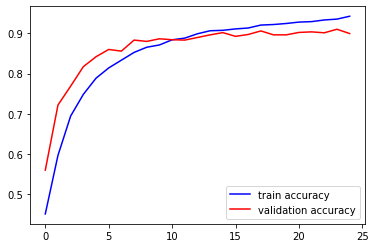

In [33]:
plt.plot(history_embedding.history['accuracy'],c='b',label='train accuracy')
plt.plot(history_embedding.history['val_accuracy'],c='r',label='validation accuracy')
plt.legend(loc='lower right')
plt.show()

In [56]:
model.evaluate(X_test_pad, y_test)

68/68 [==============================] - 2s 34ms/step - loss: 4.5067 - accuracy: 0.2940


[4.506715297698975, 0.294035404920578]

In [35]:
y_pred = np.argmax(model.predict(X_test_pad), axis  =  1)

In [36]:
y_true = np.argmax(y_test, axis = 1)

In [37]:
from sklearn import metrics
print(metrics.classification_report(y_pred, y_true))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       707
           1       0.89      0.88      0.88       292
           2       0.77      0.85      0.81       136
           3       0.95      0.91      0.93       649
           4       0.85      0.89      0.87       261
           5       0.82      0.76      0.79       101

    accuracy                           0.90      2146
   macro avg       0.87      0.87      0.87      2146
weighted avg       0.90      0.90      0.90      2146



In [38]:
def get_key(value):
    dictionary={'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5}
    for key,val in dictionary.items():
          if (val==value):
            return key

In [39]:
def predict(sentence):
    sentence_lst=[]
    sentence_lst.append(sentence)
    sentence_seq=tokenizer.texts_to_sequences(sentence_lst)
    sentence_padded=pad_sequences(sentence_seq,maxlen=300,padding='post')
    ans=get_key(model.predict_classes(sentence_padded))
    print("The emotion predicted is",ans)

In [47]:
predict(str(input('Enter a sentence : ')))

Enter a sentence : happppyyyyyy
The emotion predicted is sadness


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
